In [1]:
from __future__ import division, print_function, unicode_literals
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy import sparse

## Create data

In [2]:
N = 100 # number of points per class
d0 = 2 # dimensionality
C = 3 # number of classes
X = np.zeros((d0, N*C)) # data matrix (each row = single example)
y = np.zeros(N*C, dtype='uint8') # class labels

In [3]:
for j in range(C):
  ix = range(N*j,N*(j+1))
  
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[:,ix] = np.c_[r*np.sin(t), r*np.cos(t)].T
  y[ix] = j

# write data into a file
with open('dataset.csv', 'w') as f:
    for i in range(X.shape[1]):
        f.write(str(X[0,i]) + ',' + str(X[1,i]) + ',' + str(y[i]) + '\n')



## Visualize the data

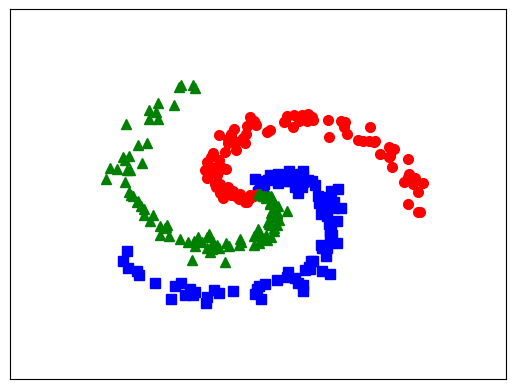

In [4]:
plt.plot(X[0, :N], X[1, :N], 'bs', markersize = 7)
plt.plot(X[0, N:2*N], X[1, N:2*N], 'ro', markersize = 7)
plt.plot(X[0, 2*N:], X[1, 2*N:], 'g^', markersize = 7)
# plt.axis('off')
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_ticks([])
cur_axes.axes.get_yaxis().set_ticks([])

plt.show()

In [6]:
y.shape

(300,)

## Support function 

In [8]:
# Softmax
def softmax(V):
    e_V = np.exp(V - np.max(V, axis = 0, keepdims = True))
    Z = e_V / e_V.sum(axis = 0)
    return Z

# One-hot coding
def one_hot_version(y, C = 3):
    Y = sparse.coo_matrix((np.ones_like(y),
        (y, np.arange(len(y)))), shape = (C, len(y))).toarray()
    return Y

# loss function
def loss_function(Y, Yhat):
    return -np.sum(Y*np.log(Yhat))/Y.shape[1]

## Training

### Init params

In [9]:
d0 = 2
d1 = h = 20 # size of hidden layer
d2 = C = 3

# initialize parameters randomly
W1 = 0.01*np.random.randn(d0, d1)
b1 = np.zeros((d1, 1))

W2 = 0.01*np.random.randn(d1, d2)
b2 = np.zeros((d2, 1))

Y = one_hot_version(y, C)
N = X.shape[1]

eta = 1 # learning rate

### Feed Forward

In [10]:
## Feedforward
Z1 = np.dot(W1.T, X) + b1
A1 = np.maximum(Z1, 0)  # ReLU(x) = max(0, x)
Z2 = np.dot(W2.T, A1) + b2
Yhat = softmax(Z2)

Yhat

array([[0.33333333, 0.33333339, 0.33333335, 0.3333337 , 0.33333422,
        0.3333356 , 0.33333586, 0.33333675, 0.33333666, 0.3333373 ,
        0.33333636, 0.33333472, 0.3333335 , 0.33333978, 0.33334104,
        0.33334554, 0.33334231, 0.3333412 , 0.33334716, 0.33334667,
        0.33334702, 0.33335145, 0.33335243, 0.3333555 , 0.33335732,
        0.33335422, 0.33335272, 0.33335974, 0.33335656, 0.33336045,
        0.33335833, 0.33336043, 0.33336315, 0.33336055, 0.33336555,
        0.33336754, 0.33336882, 0.33336737, 0.33336875, 0.33337142,
        0.33337202, 0.33336598, 0.33337395, 0.33337134, 0.33337724,
        0.33336878, 0.33337704, 0.33337545, 0.33338114, 0.33336619,
        0.33336698, 0.33337994, 0.33337237, 0.33336301, 0.33336138,
        0.3333626 , 0.33334762, 0.3333596 , 0.33334582, 0.33334817,
        0.33335051, 0.33336202, 0.33332932, 0.33333071, 0.33334328,
        0.33330354, 0.33332413, 0.333319  , 0.33332341, 0.3332995 ,
        0.33328934, 0.33330529, 0.33327805, 0.33

### Loss

In [10]:
# Get lost
loss = loss_function(Y, Yhat)
print(loss)

1.0986027218769117


### Backproganation

In [14]:
# backpropagation
E2 = (Yhat - Y )/N
dW2 = np.dot(A1, E2.T)
db2 = np.sum(E2, axis = 1, keepdims = True)
E1 = np.dot(W2, E2)
E1[Z1 <= 0] = 0 # gradient of ReLU
dW1 = np.dot(X, E1.T)
db1 = np.sum(E1, axis = 1, keepdims = True)

# Gradient Descent update
W1 += -eta*dW1
b1 += -eta*db1
W2 += -eta*dW2
b2 += -eta*db2

### Predict

In [11]:
def predict(X):
    Z1 = np.dot(W1.T, X) + b1
    A1 = np.maximum(Z1, 0)
    Z2 = np.dot(W2.T, A1) + b2
    Yhat = softmax(Z2)
    return np.argmax(Yhat, axis=0)

## Visualize after training

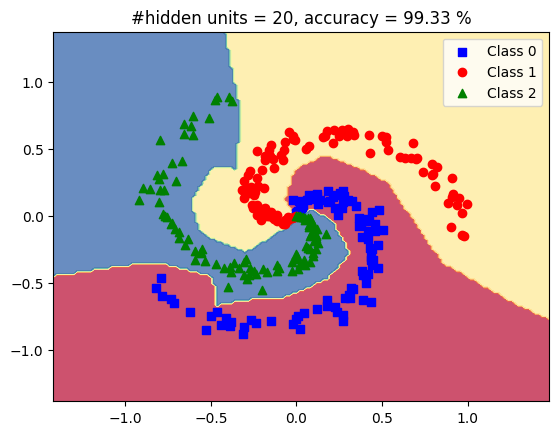

In [14]:
h = 0.02
x_min, x_max = X[0, :].min() - 0.5, X[0, :].max() + 0.5
y_min, y_max = X[1, :].min() - 0.5, X[1, :].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
grid = np.c_[xx.ravel(), yy.ravel()].T

Z = predict(grid)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)

N = 100
plt.scatter(X[0, :N], X[1, :N], c='blue', marker='s', label='Class 0')
plt.scatter(X[0, N:2 * N], X[1, N:2 * N], c='red', marker='o', label='Class 1')
plt.scatter(X[0, 2 * N:], X[1, 2 * N:], c='green', marker='^', label='Class 2')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title(f"#hidden units = {d1}, accuracy = {np.mean(predict(X) == y) * 100:.2f} %")
plt.legend()
plt.show()

## Full Train

In [13]:
for _ in range(10000):
  ## Feedforward
  Z1 = np.dot(W1.T, X) + b1
  A1 = np.maximum(Z1, 0)
  Z2 = np.dot(W2.T, A1) + b2
  Yhat = softmax(Z2)
  # Get lost
  loss = loss_function(Y, Yhat)
  print(loss)
  # backpropagation
  E2 = (Yhat - Y )/N
  dW2 = np.dot(A1, E2.T)
  db2 = np.sum(E2, axis = 1, keepdims = True)
  E1 = np.dot(W2, E2)
  E1[Z1 <= 0] = 0 # gradient of ReLU
  dW1 = np.dot(X, E1.T)
  db1 = np.sum(E1, axis = 1, keepdims = True)

  # Gradient Descent update
  W1 += -eta*dW1
  b1 += -eta*db1
  W2 += -eta*dW2
  b2 += -eta*db2

1.0986460873183523
1.098527013933586
1.0983941739514382
1.0981777436245808
1.0978099709000018
1.0971953143101085
1.0961331149746678
1.0942783365780901
1.0910391247833293
1.085404046516795
1.0757353927290787
1.0595621860899287
1.0339069714368794
0.9964700129780084
0.9486891498296114
0.8972058028677066
0.8510918858218756
0.8258134245657012
0.9207219019693643
1.5613773202266747
1.0368297181740724
0.8833149107221455
0.7987758419399719
0.7661019733058974
0.7775684334687814
0.9314137881187817
1.3643337777310725
0.9203438548205033
0.7919789618972779
0.7499976250453247
0.7326555742890347
0.7224270374122231
0.7147938301368479
0.7110344314530349
0.7090365359787688
0.7169684874864543
0.7298538956808286
0.7794306621943027
0.7685635171367838
0.812742385387347
0.7282053578682238
0.7210920911990806
0.7011184529960229
0.7004892099751501
0.6912234077677073
0.6950940153186531
0.6988499421840305
0.7125521587801111
0.7283008913897991
0.7174716633247733
0.738086050476173
0.6945470401223564
0.67018628237862